# Price Plot Gallery

The price plot creates bubble chart visualizations showing price distribution analysis across different categories. It displays price bands as vertical layers with bubble sizes representing the percentage of products in each price range for different groups (retailers, countries, etc.).

Price plots excel at:
- **Price Band Analysis**: Automatically bins price data into ranges
- **Categorical Comparison**: Compare price distributions across different groups
- **Competitive Pricing**: Identify pricing gaps and opportunities
- **Price Architecture Visualization**: Visualize competitive pricing landscapes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyretailscience.plots import price

## Equal-Width Price Bins

Use integer `bins` parameter to create equal-width price bins automatically.

---

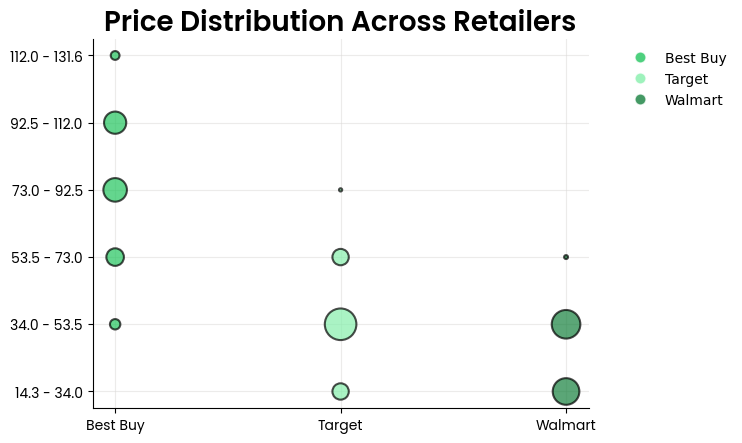

In [ ]:
# Create sample product price data with realistic distributions for each retailer
rng = np.random.default_rng(42)

# Generate price data with different distributions for each retailer
target_prices = rng.normal(45, 12, 150)  # Target: mid-range pricing (mean=45, std=12)
walmart_prices = rng.normal(35, 8, 200)  # Walmart: budget pricing (mean=35, std=8)
bestbuy_prices = rng.normal(85, 20, 100)  # Best Buy: premium pricing (mean=85, std=20)

# Combine into DataFrame
product_data = pd.DataFrame(
    {
        "product_id": range(1, 451),
        "price": np.concatenate([target_prices, walmart_prices, bestbuy_prices]),
        "retailer": ["Target"] * 150 + ["Walmart"] * 200 + ["Best Buy"] * 100,
    },
)

# Ensure no negative prices
product_data["price"] = product_data["price"].clip(lower=5)

# Use integer bins for equal-width price bands
price.plot(
    product_data,
    value_col="price",
    group_col="retailer",
    bins=6,
    title="Price Distribution Across Retailers",
    move_legend_outside=True,
)
plt.show()

## Custom Price Bin Boundaries

Use list `bins` parameter to define custom price bin boundaries for specific business logic.

---

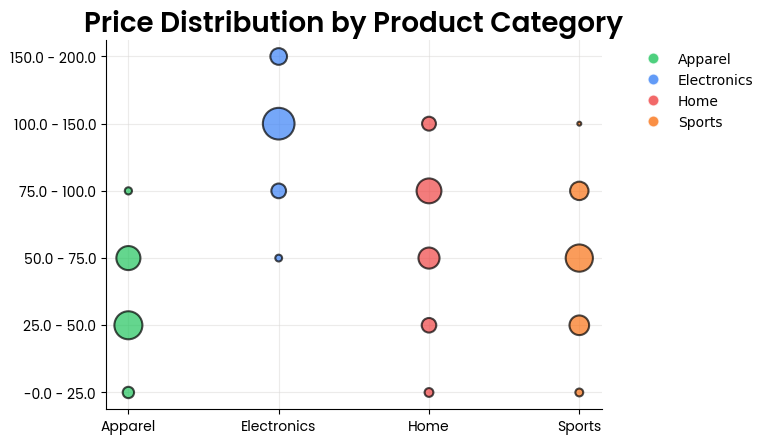

In [ ]:
# Create sample product data with realistic category price distributions
rng = np.random.default_rng(123)

# Generate price data with different distributions for each category
electronics_prices = rng.normal(120, 30, 100)  # Electronics: higher prices (mean=120, std=30)
apparel_prices = rng.normal(45, 15, 120)  # Apparel: mid-range (mean=45, std=15)
home_prices = rng.normal(75, 25, 80)  # Home: varied range (mean=75, std=25)
sports_prices = rng.normal(60, 18, 100)  # Sports: moderate range (mean=60, std=18)

# Combine into DataFrame
product_data_custom = pd.DataFrame(
    {
        "product_id": range(1, 401),
        "price": np.concatenate([electronics_prices, apparel_prices, home_prices, sports_prices]),
        "category": ["Electronics"] * 100 + ["Apparel"] * 120 + ["Home"] * 80 + ["Sports"] * 100,
    },
)

# Ensure no negative prices
product_data_custom["price"] = product_data_custom["price"].clip(lower=10)

# Define custom bin boundaries based on business logic
custom_bins = [0, 25, 50, 75, 100, 150, 200]

price.plot(
    product_data_custom,
    value_col="price",
    group_col="category",
    bins=custom_bins,
    title="Price Distribution by Product Category",
    move_legend_outside=True,
)
plt.show()